In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/training-dataset/Dataset - Updated.csv
/kaggle/input/highriskpregnancydataset2/Maternal_Health_Risk_Assessment Original Dataset.csv


## IMPORTING DATASETS

### With dataset 1

In [2]:
df1 = pd.read_csv('/kaggle/input/training-dataset/Dataset - Updated.csv')
df1 = df1[df1['Age']<100]
X = df1.copy()
y1 = X.pop('Risk Level')

In [3]:
missing_features = X.columns[X.isnull().any()].tolist()
missing_features

['Systolic BP',
 'Diastolic',
 'BS',
 'BMI',
 'Previous Complications',
 'Preexisting Diabetes',
 'Heart Rate']

In [4]:
X.head()

,Age,Systolic BP,Diastolic,BS,Body Temp,BMI,Previous Complications,Preexisting Diabetes,Gestational Diabetes,Mental Health,Heart Rate
0,22,90.0,60.0,9.0,100,18.0,1.0,1.0,0,1,80.0
1,22,110.0,70.0,7.1,98,20.4,0.0,0.0,0,0,74.0
2,27,110.0,70.0,7.5,98,23.0,1.0,0.0,0,0,72.0
3,20,100.0,70.0,7.2,98,21.2,0.0,0.0,0,0,74.0
4,20,90.0,60.0,7.5,98,19.7,0.0,0.0,0,0,74.0


In [5]:
new_index = [f + '_missing' for f in missing_features]
X[new_index] = X[missing_features].isnull().astype(int)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='constant', fill_value=-999)
X[missing_features] = imputer.fit_transform(X[missing_features])

In [6]:
X['MAP'] = ((2 * X['Diastolic']) + X['Systolic BP']) / 3

In [7]:
df1 = pd.concat([pd.DataFrame(X), pd.Series(y1, name='target')], axis=1)
df1 = df1.dropna(subset=['target'])

X = df1.drop('target', axis=1)


In [36]:
y1 = df1['target']

In [8]:
X

,Age,Systolic BP,Diastolic,BS,Body Temp,BMI,Previous Complications,Preexisting Diabetes,Gestational Diabetes,Mental Health,Heart Rate,Systolic BP_missing,Diastolic_missing,BS_missing,BMI_missing,Previous Complications_missing,Preexisting Diabetes_missing,Heart Rate_missing,MAP
0,22,90.0,60.0,9.0,100,18.0,1.0,1.0,0,1,80.0,0,0,0,0,0,0,0,70.000000
1,22,110.0,70.0,7.1,98,20.4,0.0,0.0,0,0,74.0,0,0,0,0,0,0,0,83.333333
2,27,110.0,70.0,7.5,98,23.0,1.0,0.0,0,0,72.0,0,0,0,0,0,0,0,83.333333
3,20,100.0,70.0,7.2,98,21.2,0.0,0.0,0,0,74.0,0,0,0,0,0,0,0,80.000000
4,20,90.0,60.0,7.5,98,19.7,0.0,0.0,0,0,74.0,0,0,0,0,0,0,0,70.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,41,140.0,95.0,16.0,98,22.0,0.0,0.0,1,1,90.0,0,0,0,0,0,0,0,110.000000
1201,25,110.0,90.0,6.0,98,19.0,0.0,0.0,1,1,92.0,0,0,0,0,0,0,0,96.666667
1202,21,150.0,110.0,4.9,98,21.5,0.0,0.0,1,1,66.0,0,0,0,0,0,0,0,123.333333
1203,23,130.0,100.0,5.1,98,27.0,0.0,0.0,1,1,60.0,0,0,0,0,0,0,0,110.000000


In [11]:
set(type(val) for val in y1)

{str}

In [12]:
df1

,Age,Systolic BP,Diastolic,BS,Body Temp,BMI,Previous Complications,Preexisting Diabetes,Gestational Diabetes,Mental Health,Heart Rate,Systolic BP_missing,Diastolic_missing,BS_missing,BMI_missing,Previous Complications_missing,Preexisting Diabetes_missing,Heart Rate_missing,MAP,target
0,22,90.0,60.0,9.0,100,18.0,1.0,1.0,0,1,80.0,0,0,0,0,0,0,0,70.000000,High
1,22,110.0,70.0,7.1,98,20.4,0.0,0.0,0,0,74.0,0,0,0,0,0,0,0,83.333333,Low
2,27,110.0,70.0,7.5,98,23.0,1.0,0.0,0,0,72.0,0,0,0,0,0,0,0,83.333333,Low
3,20,100.0,70.0,7.2,98,21.2,0.0,0.0,0,0,74.0,0,0,0,0,0,0,0,80.000000,Low
4,20,90.0,60.0,7.5,98,19.7,0.0,0.0,0,0,74.0,0,0,0,0,0,0,0,70.000000,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,41,140.0,95.0,16.0,98,22.0,0.0,0.0,1,1,90.0,0,0,0,0,0,0,0,110.000000,High
1201,25,110.0,90.0,6.0,98,19.0,0.0,0.0,1,1,92.0,0,0,0,0,0,0,0,96.666667,High
1202,21,150.0,110.0,4.9,98,21.5,0.0,0.0,1,1,66.0,0,0,0,0,0,0,0,123.333333,High
1203,23,130.0,100.0,5.1,98,27.0,0.0,0.0,1,1,60.0,0,0,0,0,0,0,0,110.000000,High


In [13]:
discrete_features = X.dtypes == int

## Some basic Feature Engineering

In [14]:
from sklearn.feature_selection import mutual_info_classif
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [15]:
mi_scores = make_mi_scores(X, y1, discrete_features)

In [16]:
mi_scores

BMI                               0.452117
Heart Rate                        0.328890
BS                                0.311775
Preexisting Diabetes              0.267024
Mental Health                     0.214045
Previous Complications            0.160572
MAP                               0.128542
Gestational Diabetes              0.120462
Systolic BP                       0.094895
Diastolic                         0.087532
Age                               0.060793
Body Temp                         0.025961
Systolic BP_missing               0.001725
Diastolic_missing                 0.000861
BS_missing                        0.000774
Previous Complications_missing    0.000774
Preexisting Diabetes_missing      0.000774
Heart Rate_missing                0.000774
BMI_missing                       0.000246
Name: MI Scores, dtype: float64

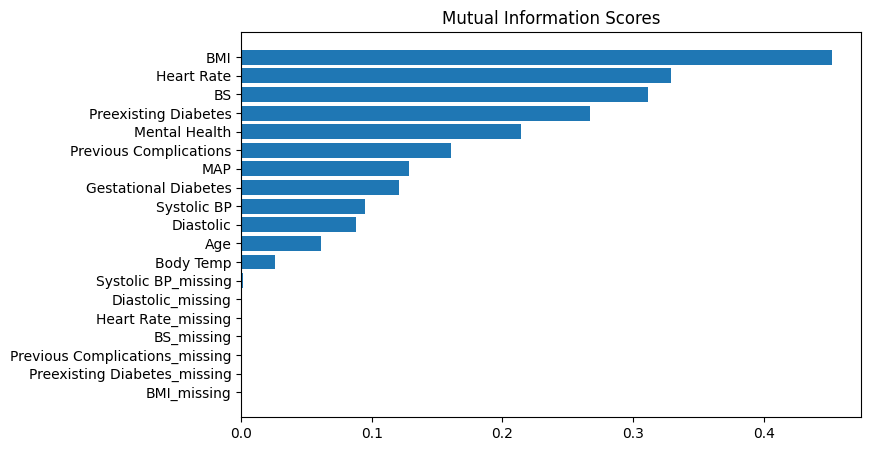

In [17]:
import matplotlib.pyplot as plt
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

In [18]:
df1.head()

,Age,Systolic BP,Diastolic,BS,Body Temp,BMI,Previous Complications,Preexisting Diabetes,Gestational Diabetes,Mental Health,Heart Rate,Systolic BP_missing,Diastolic_missing,BS_missing,BMI_missing,Previous Complications_missing,Preexisting Diabetes_missing,Heart Rate_missing,MAP,target
0,22,90.0,60.0,9.0,100,18.0,1.0,1.0,0,1,80.0,0,0,0,0,0,0,0,70.000000,High
1,22,110.0,70.0,7.1,98,20.4,0.0,0.0,0,0,74.0,0,0,0,0,0,0,0,83.333333,Low
2,27,110.0,70.0,7.5,98,23.0,1.0,0.0,0,0,72.0,0,0,0,0,0,0,0,83.333333,Low
3,20,100.0,70.0,7.2,98,21.2,0.0,0.0,0,0,74.0,0,0,0,0,0,0,0,80.000000,Low
4,20,90.0,60.0,7.5,98,19.7,0.0,0.0,0,0,74.0,0,0,0,0,0,0,0,70.000000,Low


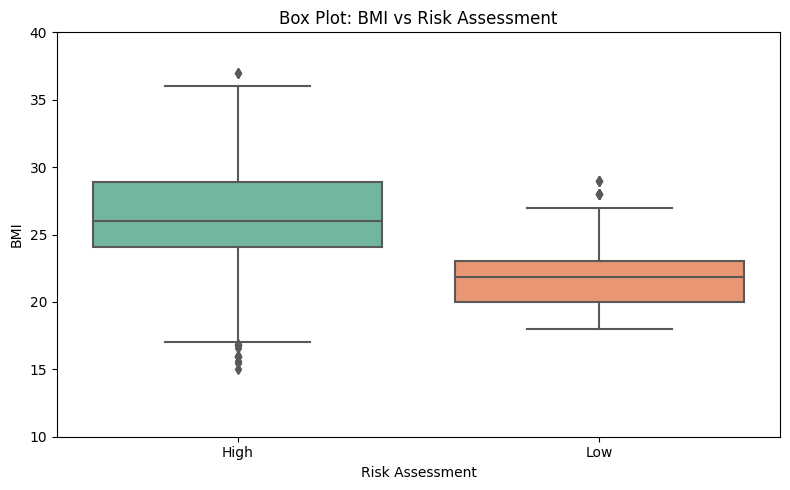

In [19]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='target', y='BMI', data=df1, palette='Set2')

# Set the y-axis limit to exclude negative values (e.g., starting from 0)
plt.ylim(10, df1['BMI'].max() + 3)  # Adjust 5 or any value to give some space

# Add labels and title
plt.title('Box Plot: BMI vs Risk Assessment')
plt.xlabel('Risk Assessment')
plt.ylabel('BMI')

# Show plot
plt.tight_layout()
plt.show()

BMI can be a good feature

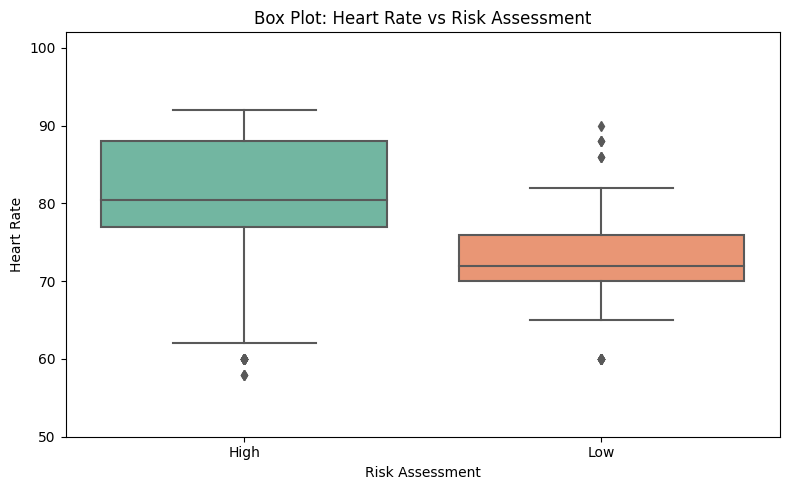

In [20]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='target', y='Heart Rate', data=df1, palette='Set2')

# Set the y-axis limit to exclude negative values (e.g., starting from 0)
plt.ylim(50, df1['Heart Rate'].max() + 10)  # Adjust 5 or any value to give some space

# Add labels and title
plt.title('Box Plot: Heart Rate vs Risk Assessment')
plt.xlabel('Risk Assessment')
plt.ylabel('Heart Rate')

# Show plot
plt.tight_layout()
plt.show()

Heart Rate can be a good feature

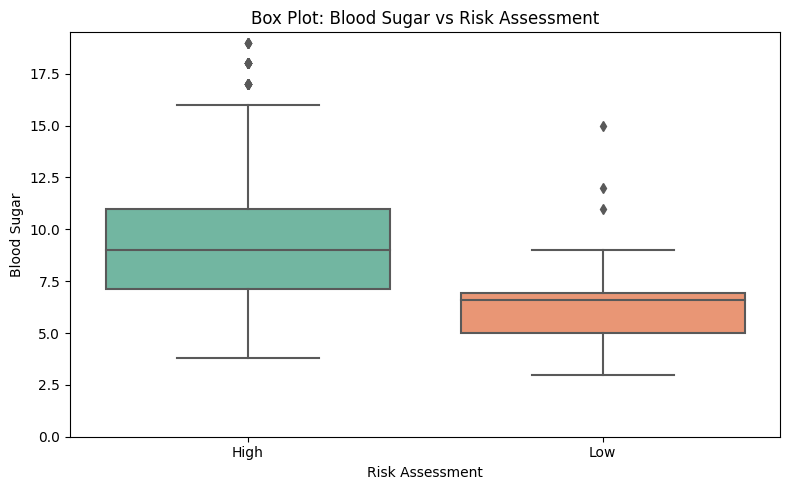

In [21]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='target', y='BS', data=df1, palette='Set2')

# Set the y-axis limit to exclude negative values (e.g., starting from 0)
plt.ylim(0, df1['BS'].max() + 0.5)  # Adjust 5 or any value to give some space

# Add labels and title
plt.title('Box Plot: Blood Sugar vs Risk Assessment')
plt.xlabel('Risk Assessment')
plt.ylabel('Blood Sugar')

# Show plot
plt.tight_layout()
plt.show()

Blood Sugar Level can be a good factor

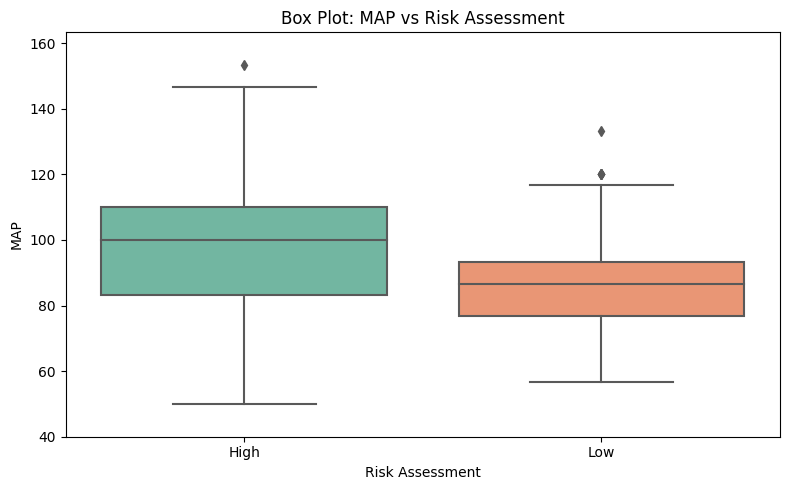

In [22]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='target', y='MAP', data=df1, palette='Set2')

# Set the y-axis limit to exclude negative values (e.g., starting from 0)
plt.ylim(40, df1['MAP'].max() + 10)  # Adjust 5 or any value to give some space

# Add labels and title
plt.title('Box Plot: MAP vs Risk Assessment')
plt.xlabel('Risk Assessment')
plt.ylabel('MAP')

# Show plot
plt.tight_layout()
plt.show()

MAP is a bad indicator

In [23]:
low_risk_sbp = df1[df1['target'] == 'Low']['Systolic BP']
print(low_risk_sbp.describe())

count    712.000000
mean     106.161517
std       84.441646
min     -999.000000
25%      100.000000
50%      120.000000
75%      120.000000
max      160.000000
Name: Systolic BP, dtype: float64


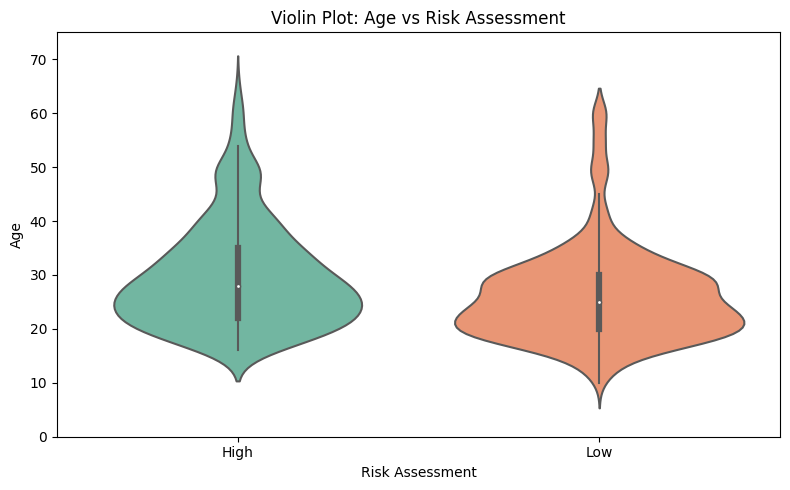

In [24]:
plt.figure(figsize=(8, 5))
sns.violinplot(x='target', y='Age', data=df1, palette='Set2')

# Set the y-axis limit to exclude negative BMI values
plt.ylim(0, df1['Age'].max() + 10)  # Add a margin above the max value

# Add labels and title
plt.title('Violin Plot: Age vs Risk Assessment')
plt.xlabel('Risk Assessment')
plt.ylabel('Age')

# Show the plot
plt.tight_layout()
plt.show()

Age is a bad indicator

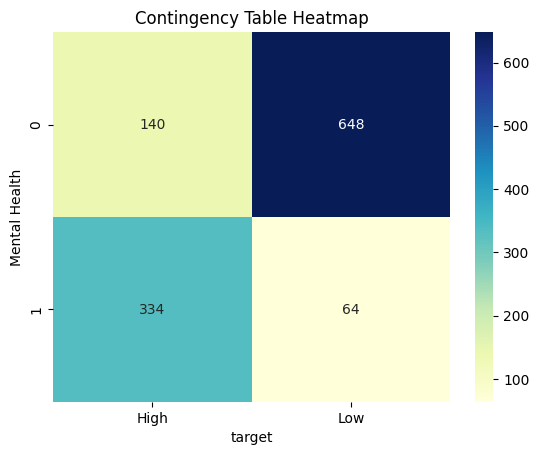

In [25]:
ct = pd.crosstab(df1['Mental Health'], df1['target'])

# Heatmap
sns.heatmap(ct, annot=True, cmap="YlGnBu", fmt='d')
plt.title('Contingency Table Heatmap')
plt.xlabel('target')
plt.ylabel('Mental Health')
plt.show()

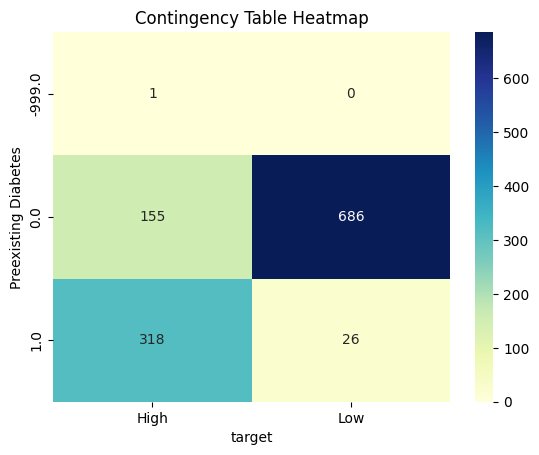

In [26]:
ct = pd.crosstab(df1['Preexisting Diabetes'], df1['target'])

# Heatmap
sns.heatmap(ct, annot=True, cmap="YlGnBu", fmt='d')
plt.title('Contingency Table Heatmap')
plt.xlabel('target')
plt.ylabel('Preexisting Diabetes')
plt.show()

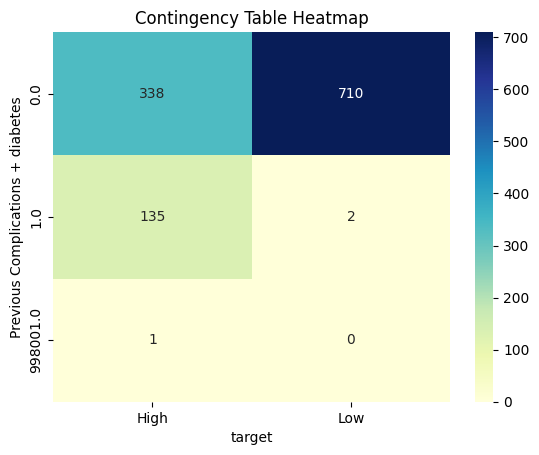

In [27]:
ct = pd.crosstab(df1['Previous Complications']*df1['Preexisting Diabetes'], df1['target'])

# Heatmap
sns.heatmap(ct, annot=True, cmap="YlGnBu", fmt='d')
plt.title('Contingency Table Heatmap')
plt.xlabel('target')
plt.ylabel('Previous Complications + diabetes')
plt.show()

Diabetes * Previous Complications is an execellent indicator

In [28]:
df1['Target'] = [1 if f == 'High' else 0 for f in df1['target'] ]

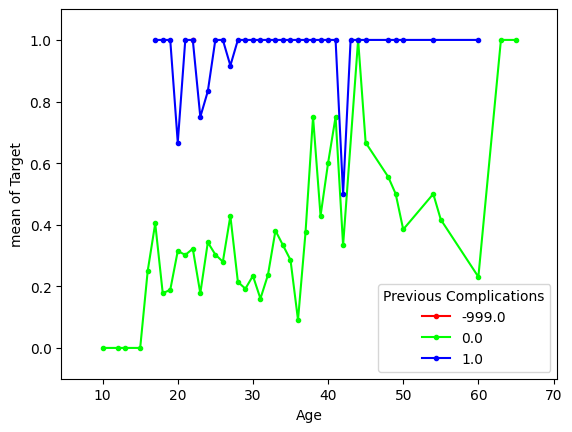

In [29]:
import statsmodels.api as sm
from statsmodels.graphics.factorplots import interaction_plot

interaction_plot(df1['Age'], df1['Previous Complications'], df1['Target'])
plt.show()

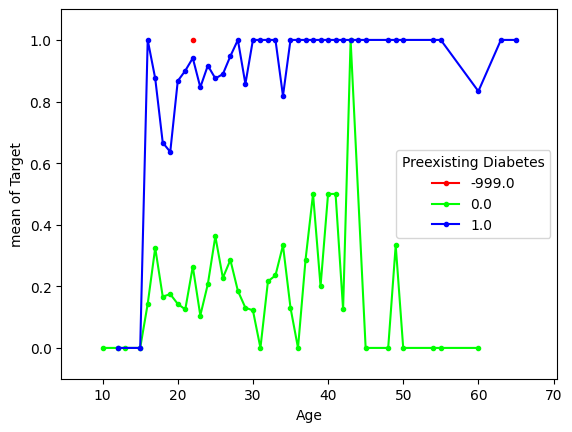

In [30]:
interaction_plot(df1['Age'], df1['Preexisting Diabetes'], df1['Target'])
plt.show()

## Using Model

In [37]:
y1 = [1 if f=='High' else 0 for f in y1]

In [38]:
y1

[1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y1, random_state=1)

In [40]:
X_test,X_valid, y_test, y_valid = train_test_split(X_test,y_test,random_state=1)

In [41]:
X_train.pop('MAP')
X_test.pop('MAP')
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators=1000, learning_rate=0.1, missing=-999.0)
eval_set = [(X_train, y_train), (X_test, y_test)] 
model.fit(
    X_train,
    y_train,
    eval_set=eval_set,
    early_stopping_rounds=10, 
    verbose=True              
)




/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.58542	validation_1-logloss:0.59862
[1]	validation_0-logloss:0.51606	validation_1-logloss:0.53211
[2]	validation_0-logloss:0.45771	validation_1-logloss:0.47607
[3]	validation_0-logloss:0.40779	validation_1-logloss:0.42892
[4]	validation_0-logloss:0.36444	validation_1-logloss:0.38505
[5]	validation_0-logloss:0.32765	validation_1-logloss:0.35130
[6]	validation_0-logloss:0.29553	validation_1-logloss:0.32269
[7]	validation_0-logloss:0.26616	validation_1-logloss:0.29334
[8]	validation_0-logloss:0.24041	validation_1-logloss:0.26776
[9]	validation_0-logloss:0.21816	validation_1-logloss:0.24580
[10]	validation_0-logloss:0.19805	validation_1-logloss:0.22599
[11]	validation_0-logloss:0.18023	validation_1-logloss:0.20856
[12]	validation_0-logloss:0.16472	validation_1-logloss:0.19338
[13]	validation_0-logloss:0.15032	validation_1-logloss:0.17981
[14]	validation_0-logloss:0.13784	validation_1-logloss:0.16760
[15]	validation_0-logloss:0.12697	validation_1-logloss:0.15671
[1

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=-999.0, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [43]:
X_valid.pop('MAP')

1055    100.000000
692      93.333333
150     103.333333
1025     71.666667
1187     81.666667
           ...    
347      80.000000
49       93.333333
604      93.333333
19       83.333333
1008     75.000000
Name: MAP, Length: 75, dtype: float64

In [44]:
predictions = model.predict(X_valid)
predictions

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1])

In [45]:
y_valid

[1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1]

In [46]:
c=0
for i in range(len(predictions)):
    if y_valid[i] == predictions[i]:
        c+=1
print(c/len(predictions))

0.9733333333333334


In [47]:
print(df1['target'].value_counts(normalize=True))

target
Low     0.600337
High    0.399663
Name: proportion, dtype: float64


In [49]:
X_valid

,Age,Systolic BP,Diastolic,BS,Body Temp,BMI,Previous Complications,Preexisting Diabetes,Gestational Diabetes,Mental Health,Heart Rate,Systolic BP_missing,Diastolic_missing,BS_missing,BMI_missing,Previous Complications_missing,Preexisting Diabetes_missing,Heart Rate_missing
1055,19,120.0,90.0,6.0,98,17.0,0.0,1.0,0,0,77.0,0,0,0,0,0,0,0
692,60,120.0,80.0,6.8,98,24.4,0.0,0.0,0,0,77.0,0,0,0,0,0,0,0
150,22,130.0,90.0,8.0,98,30.5,0.0,0.0,1,1,82.0,0,0,0,0,0,0,0
1025,25,85.0,65.0,7.7,102,17.8,1.0,0.0,0,1,80.0,0,0,0,0,0,0,0
1187,28,95.0,75.0,8.9,98,24.2,0.0,1.0,0,0,88.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,31,100.0,70.0,6.9,98,21.0,0.0,0.0,0,0,77.0,0,0,0,0,0,0,0
49,18,120.0,80.0,6.0,98,19.4,0.0,0.0,0,1,76.0,0,0,0,0,0,0,0
604,19,120.0,80.0,4.0,98,20.0,0.0,0.0,0,0,70.0,0,0,0,0,0,0,0
19,21,110.0,70.0,6.6,98,20.0,0.0,1.0,0,1,74.0,0,0,0,0,0,0,0


In [48]:
from sklearn.metrics import classification_report

print(classification_report(y_valid, predictions, target_names=['Low', 'High']))

              precision    recall  f1-score   support

         Low       0.98      0.98      0.98        47
        High       0.96      0.96      0.96        28

    accuracy                           0.97        75
   macro avg       0.97      0.97      0.97        75
weighted avg       0.97      0.97      0.97        75



In [50]:
from sklearn.metrics import r2_score
r2_score(y_valid, predictions)

0.8860182370820668